In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
data = pd.read_csv('Cars93.csv')
X = np.array(data[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile','Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Weight']])
y = np.array(data['Price'].values.reshape(-1,1))

In [3]:
alphas = np.logspace(-5,0,100)
papuaNewGuinea = LeaveOneOut()
papuaNewGuinea.get_n_splits(X)
MSE = []
coefs = []
for i in alphas:
    MSEa=[]
    coefsA = []
    for train_index, test_index in papuaNewGuinea.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = linear_model.Lasso(alpha=i, normalize = True)
        clf.fit(X_train, y_train)
        coefsA.append(clf.coef_)
        intento = clf.predict(X_test)
        yei = mean_squared_error(y_test, intento)
        MSEa.append(yei)
    
    coefsA = np.array(coefsA)
    MSEa = np.array(MSEa)
    MSE.append(np.mean(MSEa))
    coefs.append(np.mean(coefsA, axis = 0))

Text(0, 0.5, 'Coeficientes')

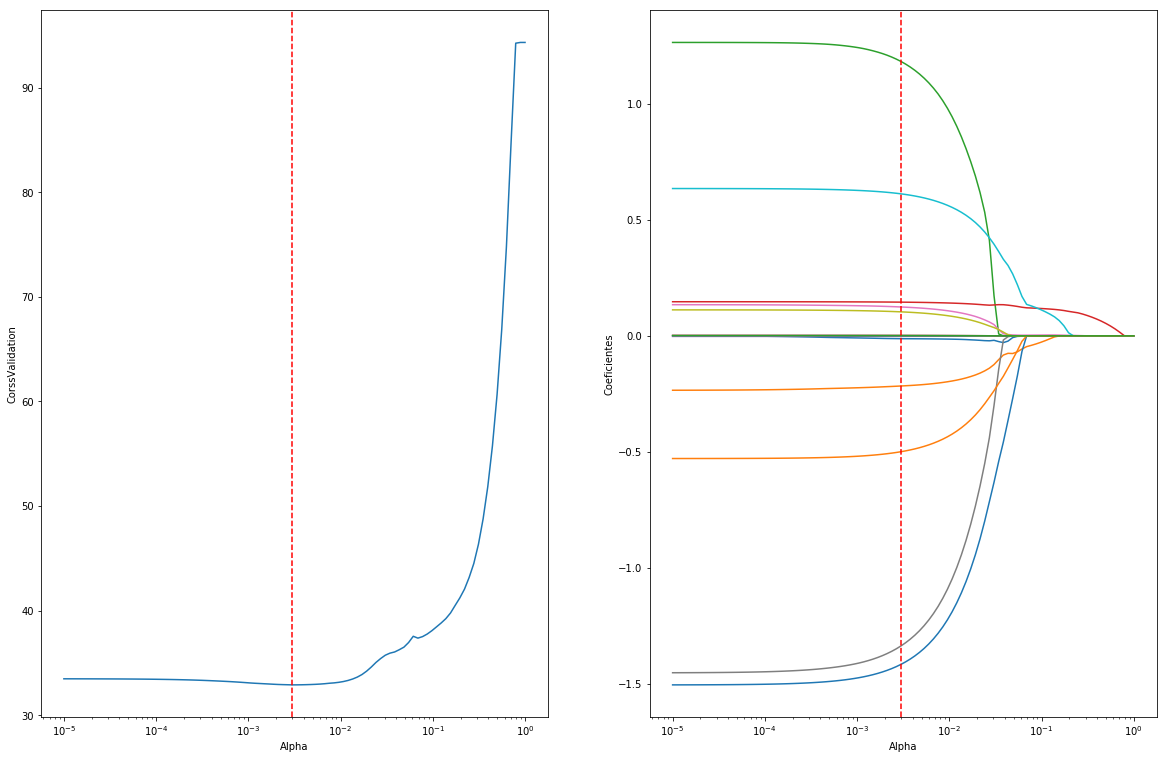

In [4]:
minimo = MSE.index(min(MSE))

fig = plt.figure(figsize=(20,13))
CrossValidation = fig.add_subplot(1, 2, 1)
line, = CrossValidation.plot(alphas, MSE)
CrossValidation.axvline(x=alphas[minimo],color='r', linestyle='--')
CrossValidation.set_xscale('log')
CrossValidation.set_xlabel("Alpha")
CrossValidation.set_ylabel("CorssValidation")

Coefs = fig.add_subplot(1,2,2)
aGraficar1 = np.zeros((13,100))
for j in range(13):
    for i in range(100):
        aGraficar1[j][i] = coefs[i][j]
    Coefs.plot(alphas, aGraficar1[j])
Coefs.axvline(x=alphas[minimo],color='r',linestyle='--')
Coefs.set_xscale('log')
Coefs.set_xlabel("Alpha")
Coefs.set_ylabel("Coeficientes")

In [5]:
print(np.shape(aGraficar)


SyntaxError: unexpected EOF while parsing (<ipython-input-5-b15f05577c4c>, line 1)